This note estimates the orientation angles between different ICRFs and the stability of these estimates.

I used two kinds of bootstrap resampling: with/without replacement.

For each sample, I estimated the orientation angles with referred to ICRF3 SX catalog based on the whole sample or the "clean" sample.

In [1]:
from astropy.table import join, Table
from astropy import units as u
import numpy as np
from numpy.random import choice
import matplotlib.pyplot as plt

# My progs
from my_progs.vlbi.read_sou import read_crf
from my_progs.catalog.read_icrf import read_icrf3, read_icrf2
from my_progs.catalog.pos_diff import radio_cat_diff_calc
from my_progs.catalog.vsh_deg1_cor import vsh_deg01_fitting
from tool_func import vsh_fitting, sample_clean

In [2]:
icrf2 = read_icrf2()
icrf3sx = read_icrf3(wv="sx")
icrf3k = read_icrf3(wv="k")
icrf3xka = read_icrf3(wv="xka")
def_list = Table([icrf3sx[icrf3sx["type"] == "D"]["iers_name"]])
opa2019a = read_crf("../data/opa2019a.crf", drop_few_obs=True)

oft_2_sx = radio_cat_diff_calc(icrf2, icrf3sx, sou_name="iers_name")
oft_2_sx_def = join(oft_2_sx, def_list, keys="iers_name")

oft_k_sx = radio_cat_diff_calc(icrf3k, icrf3sx, sou_name="iers_name")
oft_k_sx_def = join(oft_k_sx, def_list, keys="iers_name")

oft_ka_sx = radio_cat_diff_calc(icrf3xka, icrf3sx, sou_name="iers_name")
oft_ka_sx_def = join(oft_ka_sx, def_list, keys="iers_name")

oft_opa_sx = radio_cat_diff_calc(opa2019a, icrf3sx, sou_name="iers_name")
oft_opa_sx_def = join(oft_opa_sx, def_list, keys="iers_name")

There are 4468 sources in the original catalog, 2 (0%) sources with #obs < 3 dropped, leaving 4466 sources in the present catalog.


The number of common sources in the K-band catalog to the SX catalog is 793 (824 in K-band), 
and for Ka-band it is 638 (all 678).

Where are the missing sources? No idea (maybe Sebastien knows something).

Between ICRF2 and ICRF3, I only find 3410 sources.

(I remember I reported this issus before. The possible reason could be the update of the IERS designation)

# Orientation distribution

## a) ICRF2 vs. ICRF3 SX

In [3]:
print("Between ICRF2 and ICRF3 SX (without outlier elimination)")
_ = vsh_fitting(oft_2_sx, print_log=True)

print("Between ICRF2 and ICRF3 SX (with outlier elimination)")
oft_2_sx_cln = sample_clean(oft_2_sx, rho0=10, print_log=True)
_ = vsh_fitting(oft_2_sx_cln, print_log=True)

print("Between ICRF2 and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fitting(oft_2_sx_def, print_log=True)

Between ICRF2 and ICRF3 SX (without outlier elimination)
Estimates (  3410 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -17 +/-   7   +20 +/-   6    +5 +/-   5
----------------------------------------------

Between ICRF2 and ICRF3 SX (with outlier elimination)
For a sample of 3410 sources, the number of the outlier is smaller than 1 when X >= 5.00.
After elimination, there are 3250 sources in the clean sample.
The outlier rate is 4.69%.

Estimates (  3250 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -19 +/-   4   +23 +/-   4    +0 +/-   3
----------------------------------------------

Between ICRF2 and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   296 sources)
------------

### Sampling without replacement

In [38]:
opt2 = Table.read("../logs/icrf2_icrf3sx_orient.fits")
opt21 = Table.read("../logs/icrf2_icrf3sx_orient_cln.fits")

R1m_2, R1s_2 = np.mean(opt21["R1"]), np.std(opt21["R1"])
R2m_2, R2s_2 = np.mean(opt21["R2"]), np.std(opt21["R2"])
R3m_2, R3s_2 = np.mean(opt21["R3"]), np.std(opt21["R3"])
# data1 = np.vstack([[np.mean(opt21["R1"]), np.std(opt21["R1"]),
#                     np.mean(opt21["R2"]), np.std(opt21["R2"]),
#                     np.mean(opt21["R3"]), np.std(opt21["R3"])],
#                    [np.mean(optk1["R1"]), np.std(optk1["R1"]),
#                     np.mean(optk1["R2"]), np.std(optk1["R2"]),
#                     np.mean(optk1["R3"]), np.std(optk1["R3"])],
#                    [np.mean(optka1["R1"]), np.std(optka1["R1"]),
#                     np.mean(optka1["R2"]), np.std(optka1["R2"]),
#                     np.mean(optka1["R3"]), np.std(optka1["R3"])],
#                    [np.mean(optopa1["R1"]), np.std(optopa1["R1"]),
#                     np.mean(optopa1["R2"]), np.std(optopa1["R2"]),
#                     np.mean(optopa1["R3"]), np.std(optopa1["R3"])]])

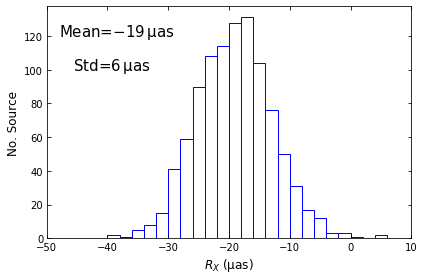

In [60]:
fig, ax = plt.subplots()

bins = np.arange(-50, 10, 2)

# ax.hist(opt2["R1"], bins, histtype="bar", color="silver", 
#         edgecolor="lightgrey", label="All")
# ax.hist(opt21["R1"], bins, histtype="bar",
#         fill=False, edgecolor="b", label="Clean")
# ax.legend()

# ax.set_xlabel("$R_1$ (ICRF2 $-$ ICRF3 SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.hist(opt21["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.set_xlim([-50, 10])
ax.set_xlabel("$R_1$ ($\mathrm{\\mu as}$)", fontsize=12)

ax.text(-48, 120, "Mean=$\mathrm{%+2.0f\,\mu as}$" % R1m_2,
       fontsize=15)
ax.text(-48, 100, "   Std=$\mathrm{%2.0f\,\mu as}$" % R1s_2,
       fontsize=15)

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R1.eps", hbox="tight")

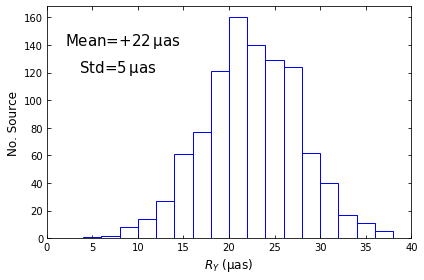

In [65]:
fig, ax = plt.subplots()

bins = np.arange(0, 40, 2)

# ax.hist(opt2["R2"], bins, histtype="bar", color="silver", 
#         edgecolor="lightgrey", label="All")
ax.hist(opt21["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
# ax.legend()

# ax.set_xlabel("$R_2$ (ICRF2 $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

ax.text(2, 140, "Mean=$\mathrm{%+2.0f\,\mu as}$" % R2m_2,
       fontsize=15)
ax.text(2, 120, "   Std=$\mathrm{%2.0f\,\mu as}$" % R2s_2,
       fontsize=15)

ax.set_xlim([0, 40])
ax.set_xlabel("$R_Y$ ($\mathrm{\\mu as}$)", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R2.eps", hbox="tight")

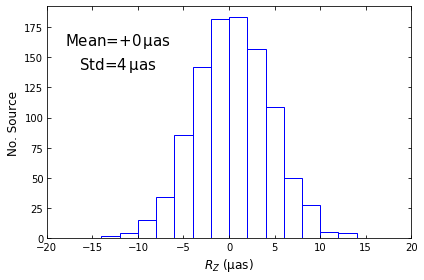

In [64]:
fig, ax = plt.subplots()

bins = np.arange(-20, 30, 2)

# ax.hist(opt2["R3"], bins, histtype="bar", color="silver", 
#         edgecolor="lightgrey", label="All")
ax.hist(opt21["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
# ax.legend()

# ax.set_xlabel("$R_3$ (ICRF2 $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)
ax.set_xlim([-20, 20])

ax.text(-18, 160, "Mean=$\mathrm{%+2.0f\,\mu as}$" % R3m_2,
       fontsize=15)
ax.text(-18, 140, "   Std=$\mathrm{%2.0f\,\mu as}$" % R3s_2,
       fontsize=15)

ax.set_xlabel("$R_3$ ($\mathrm{\\mu as}$)", fontsize=12)

plt.tight_layout()
plt.savefig("../plots/icrf2-icrf3sx-R3.eps", hbox="tight")

## b) ICRF3 K vs ICRF3 SX

In [8]:
print("Between ICRF3 K and ICRF3 SX (without outlier elimination)")
_ = vsh_fitting(oft_k_sx, print_log=True)

print("Between ICRF3 K and ICRF3 SX (with outlier elimination)")
oft_k_sx_cln = sample_clean(oft_k_sx, rho0=10, print_log=True)
_ = vsh_fitting(oft_k_sx_cln, print_log=True)

print("Between ICRF3 K and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fitting(oft_k_sx_def, print_log=True)

Between ICRF3 K and ICRF3 SX (without outlier elimination)
Estimates (   793 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -39 +/-  22   -31 +/-  22    +3 +/-  14
----------------------------------------------

Between ICRF3 K and ICRF3 SX (with outlier elimination)
For a sample of 793 sources, the number of the outlier is smaller than 1 when X >= 5.00.
After elimination, there are 770 sources in the clean sample.
The outlier rate is 2.90%.

Estimates (   770 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -21 +/-   6   -18 +/-   6   -11 +/-   4
----------------------------------------------

Between ICRF3 K and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   193 sources)
--------

In [9]:
optk = Table.read("../logs/icrf3k_icrf3sx_orient.fits")
optk1 = Table.read("../logs/icrf3k_icrf3sx_orient_cln.fits")

Text(0, 0.5, 'No. Source')

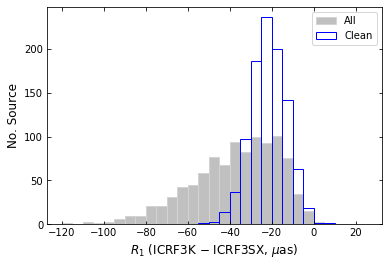

In [10]:
fig, ax = plt.subplots()

bins = np.arange(-120, 30, 5)

ax.hist(optk["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ (ICRF3K $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

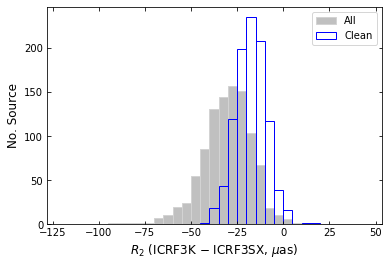

In [11]:
fig, ax = plt.subplots()

bins = np.arange(-120, 50, 5)

ax.hist(optk["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ (ICRF3K $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

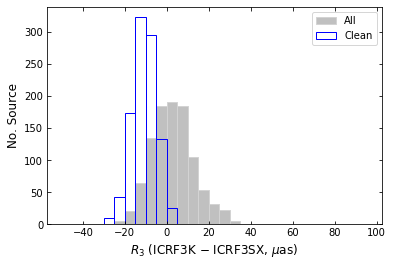

In [12]:
fig, ax = plt.subplots()

bins = np.arange(-50, 100, 5)

ax.hist(optk["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optk1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ (ICRF3K $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

# ICRF3 XKa vs ICRF3 SX

In [13]:
print("Between ICRF3 XKa and ICRF3 SX (without outlier elimination)")
_ = vsh_fitting(oft_ka_sx, print_log=True)

print("Between ICRF3 XKa and ICRF3 SX (with outlier elimination)")
oft_ka_sx_cln = sample_clean(oft_ka_sx, rho0=10, print_log=True)
_ = vsh_fitting(oft_ka_sx_cln, print_log=True)

print("Between ICRF3 XKa and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fitting(oft_ka_sx_def, print_log=True)

Between ICRF3 XKa and ICRF3 SX (without outlier elimination)
Estimates (   638 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -52 +/-  15   -15 +/-  15   -10 +/-  10
----------------------------------------------

Between ICRF3 XKa and ICRF3 SX (with outlier elimination)
For a sample of 638 sources, the number of the outlier is smaller than 1 when X >= 5.00.
After elimination, there are 523 sources in the clean sample.
The outlier rate is 18.03%.

Estimates (   523 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   -53 +/-  12    -9 +/-  12    +6 +/-   9
----------------------------------------------

Between ICRF3 XKa and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   176 sources)
-

In [14]:
optka = Table.read("../logs/icrf3xka_icrf3sx_orient.fits")
optka1 = Table.read("../logs/icrf3xka_icrf3sx_orient_cln.fits")

Text(0, 0.5, 'No. Source')

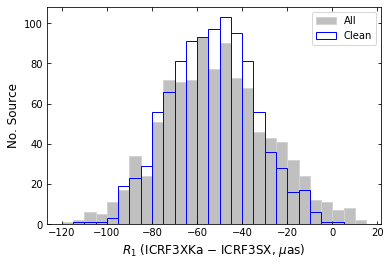

In [15]:
fig, ax = plt.subplots()

bins = np.arange(-120, 20, 5)

ax.hist(optka["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ (ICRF3XKa $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

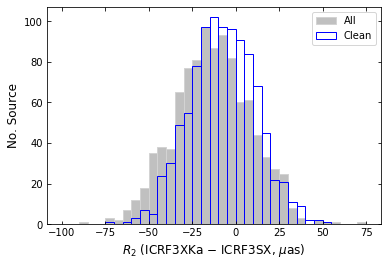

In [16]:
fig, ax = plt.subplots()

bins = np.arange(-100, 80, 5)

ax.hist(optka["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ (ICRF3XKa $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

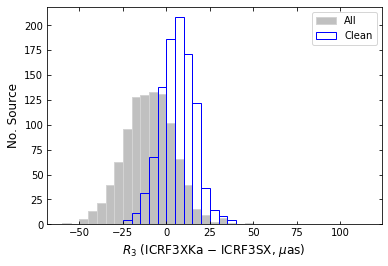

In [17]:
fig, ax = plt.subplots()

bins = np.arange(-60, 120, 5)

ax.hist(optka["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optka1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ (ICRF3XKa $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

## OPA2019a vs. ICRF3 SX

In [18]:
print("Between OPA2019a and ICRF3 SX (without outlier elimination)")
_ = vsh_fitting(oft_opa_sx, print_log=True)

print("Between OPA2019a and ICRF3 SX (with outlier elimination)")
oft_opa_sx_cln = sample_clean(oft_opa_sx, rho0=10, print_log=True)
_ = vsh_fitting(oft_opa_sx_cln, print_log=True)

print("Between OPA2019a and ICRF3 SX (Only ICRF3 defining sources)")
_ = vsh_fitting(oft_opa_sx_def, print_log=True)

Between OPA2019a and ICRF3 SX (without outlier elimination)
Estimates (  4380 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   +29 +/-   4   -51 +/-   4    -1 +/-   3
----------------------------------------------

Between OPA2019a and ICRF3 SX (with outlier elimination)
For a sample of 4380 sources, the number of the outlier is smaller than 1 when X >= 5.00.
After elimination, there are 4331 sources in the clean sample.
The outlier rate is 1.12%.

Estimates (  4331 sources)
----------------------------------------------
               Rotation [uas]                 
       x             y             z          
----------------------------------------------
   +28 +/-   2   -50 +/-   2    -1 +/-   1
----------------------------------------------

Between OPA2019a and ICRF3 SX (Only ICRF3 defining sources)
Estimates (   303 sources)
---

In [19]:
optopa = Table.read("../logs/opa2019a_icrf3sx_orient.fits")
optopa1 = Table.read("../logs/opa2019a_icrf3sx_orient_cln.fits")

Text(0, 0.5, 'No. Source')

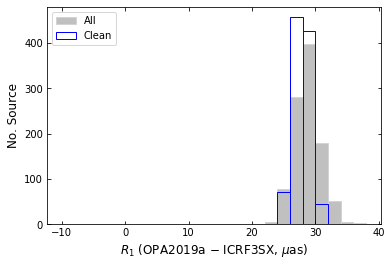

In [20]:
fig, ax = plt.subplots()

bins = np.arange(-10, 40, 2)

ax.hist(optopa["R1"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R1"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_1$ (OPA2019a $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

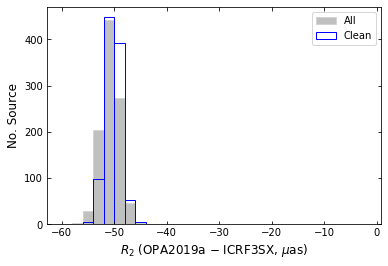

In [21]:
fig, ax = plt.subplots()

bins = np.arange(-60, 0, 2)

ax.hist(optopa["R2"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R2"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_2$ (OPA2019a $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

Text(0, 0.5, 'No. Source')

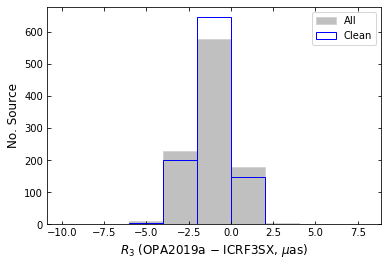

In [22]:
fig, ax = plt.subplots()

bins = np.arange(-10, 10, 2)

ax.hist(optopa["R3"], bins, histtype="bar", color="silver", 
        edgecolor="lightgrey", label="All")
ax.hist(optopa1["R3"], bins, histtype="bar",
        fill=False, edgecolor="b", label="Clean")
ax.legend()

ax.set_xlabel("$R_3$ (OPA2019a $-$ ICRF3SX, $\mu$as)", fontsize=12)
ax.set_ylabel("No. Source", fontsize=12)

# Statistic results

In [23]:
cat = ["ICRF2", "ICRF3K", "ICRF3Ka", "OPA2019a"]

N_com = [3410, 793, 638, 4380]
N_pick = [2275, 530, 425, 2920]

## a) use all sources without replacement

In [24]:
data = np.vstack([[np.mean(opt2["R1"]), np.std(opt2["R1"]),
                   np.mean(opt2["R2"]), np.std(opt2["R2"]),
                   np.mean(opt2["R3"]), np.std(opt2["R3"])],
                  [np.mean(optk["R1"]), np.std(optk["R1"]),
                   np.mean(optk["R2"]), np.std(optk["R2"]),
                   np.mean(optk["R3"]), np.std(optk["R3"])],
                  [np.mean(optka["R1"]), np.std(optka["R1"]),
                   np.mean(optka["R2"]), np.std(optka["R2"]),
                   np.mean(optka["R3"]), np.std(optka["R3"])],
                  [np.mean(optopa["R1"]), np.std(optopa["R1"]),
                   np.mean(optopa["R2"]), np.std(optopa["R2"]),
                   np.mean(optopa["R3"]), np.std(optopa["R3"])]])

data = data.T

In [25]:
tab = Table([cat, N_com, N_pick, *data],
            names=["catalog", "num_com", "num_pick", "R1_m", "R1_std", "R2_m", "R2_std", "R3_m", "R3_std"])

tab["catalog"].format = "%8s"

tab["R1_m"].format = "$%+4.0f$"
tab["R2_m"].format = "$%+4.0f$"
tab["R3_m"].format = "$%+4.0f$"

tab["R1_std"].format = "%3.0f"
tab["R2_std"].format = "%3.0f"
tab["R3_std"].format = "%3.0f"

tab

catalog,num_com,num_pick,R1_m,R1_std,R2_m,R2_std,R3_m,R3_std
str8,int64,int64,float64,float64,float64,float64,float64,float64
ICRF2,3410,2275,$ -17$,7,$ +20$,7,$ +5$,5
ICRF3K,793,530,$ -38$,22,$ -30$,13,$ +3$,10
ICRF3Ka,638,425,$ -52$,24,$ -13$,22,$ -10$,14
OPA2019a,4380,2920,$ +29$,2,$ -51$,2,$ -1$,1


In [26]:
tab["R1_std"].format = "$\pm$%3.0f"
tab["R2_std"].format = "$\pm$%3.0f"
tab["R3_std"].format = "$\pm$%3.0f"

tab.write("../logs/icrf-orient-sta.tex", format="ascii.latex", overwrite=True)

## b) use clean samples without replacement

In [27]:
data1 = np.vstack([[np.mean(opt21["R1"]), np.std(opt21["R1"]),
                    np.mean(opt21["R2"]), np.std(opt21["R2"]),
                    np.mean(opt21["R3"]), np.std(opt21["R3"])],
                   [np.mean(optk1["R1"]), np.std(optk1["R1"]),
                    np.mean(optk1["R2"]), np.std(optk1["R2"]),
                    np.mean(optk1["R3"]), np.std(optk1["R3"])],
                   [np.mean(optka1["R1"]), np.std(optka1["R1"]),
                    np.mean(optka1["R2"]), np.std(optka1["R2"]),
                    np.mean(optka1["R3"]), np.std(optka1["R3"])],
                   [np.mean(optopa1["R1"]), np.std(optopa1["R1"]),
                    np.mean(optopa1["R2"]), np.std(optopa1["R2"]),
                    np.mean(optopa1["R3"]), np.std(optopa1["R3"])]])

data1 = data1.T

In [28]:
tab1 = Table([cat, N_com, N_pick, *data1],
             names=["catalog", "num_com", "num_pick", "R1_m", "R1_std", "R2_m", "R2_std", "R3_m", "R3_std"])

tab1["catalog"].format = "%8s"

tab1["R1_m"].format = "$%+4.0f$"
tab1["R2_m"].format = "$%+4.0f$"
tab1["R3_m"].format = "$%+4.0f$"

tab1["R1_std"].format = "%3.0f"
tab1["R2_std"].format = "%3.0f"
tab1["R3_std"].format = "%3.0f"

tab1

catalog,num_com,num_pick,R1_m,R1_std,R2_m,R2_std,R3_m,R3_std
str8,int64,int64,float64,float64,float64,float64,float64,float64
ICRF2,3410,2275,$ -19$,6,$ +22$,5,$ +0$,4
ICRF3K,793,530,$ -21$,8,$ -18$,8,$ -11$,6
ICRF3Ka,638,425,$ -53$,19,$ -7$,19,$ +6$,10
OPA2019a,4380,2920,$ +28$,2,$ -50$,2,$ -1$,1


In [29]:
tab1["R1_std"].format = "$\pm$%3.0f"
tab1["R2_std"].format = "$\pm$%3.0f"
tab1["R3_std"].format = "$\pm$%3.0f"

tab1.write("../logs/icrf-orient-sta1.tex", format="ascii.latex", overwrite=True)